# DynamicSound simulation

In [1]:
import os
import dynamic_sound as ds
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import numpy as np
import pyroomacoustics as pra

In [17]:
source_path = ds.Path([
    [0.0,  173, 3, 1,   1, 0, 0, 0],
    [3.0,  171.5, 3, 1,   1, 0, 0, 0],
    [10.0,  -171.5, 3, 1,   1, 0, 0, 0]
])
microphone_path = ds.Path([
    [0.0,  0, 0, 1,   1, 0, 0, 0],
    [10.0,  0, 0, 1,   1, 0, 0, 0]
])

# simulation environment
sim = ds.Simulation(
    temperature=20,
    pressure=1,
    relative_humidity=50
)

# microphone
mic_sample_rate = 48_000
microphone = ds.microphones.Microphone("_tmp/dynamicsound_sine_dynamic.wav", sample_rate=mic_sample_rate)
sim.add_microphone(path=microphone_path, microphone=microphone)

# source
source = ds.sources.SineWave(frequency=2_000, amplitude=1.0)
sim.add_source(
    path=source_path,
    source=source
)

sim.run()

100%|██████████| 480000/480000 [15:31<00:00, 515.25it/s] 


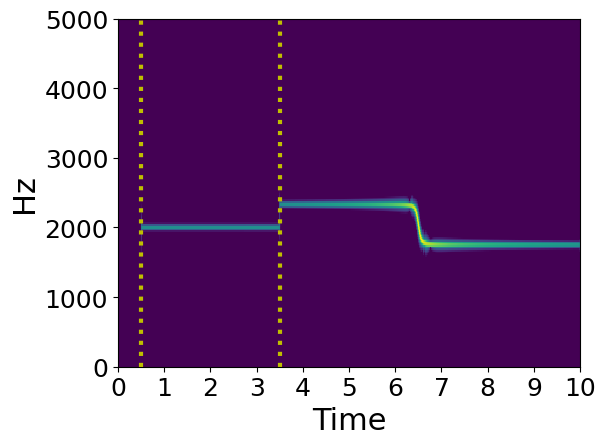

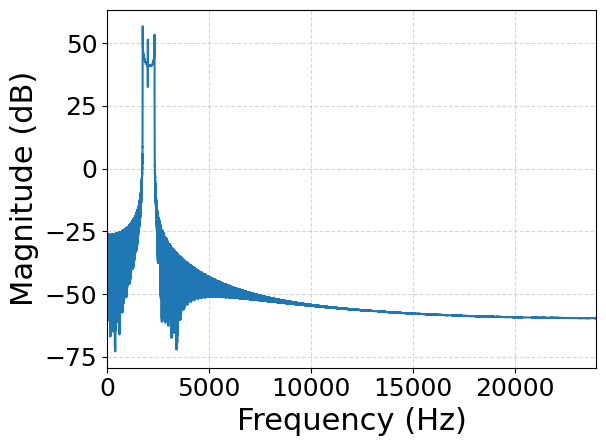

In [5]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


signal, sr = librosa.load("_tmp/dynamicsound_sine_dynamic.wav", sr=None, mono=False)

if signal.ndim == 1:  # if single channel reshape to a common format (n_channels, n_samples)
    signal = signal.reshape(1, -1)
    
ipd.display(ipd.Audio(signal[0], rate=sr))

D = librosa.stft(signal[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='fft', cmap='viridis', vmin=-70, vmax=-0)
plt.ylim(0, 5_000)
plt.xlim(0, 10)
# plt.colorbar(format='%+2.0f dB')
plt.axvline(3.5, color='y', linestyle=':', linewidth=3)
plt.axvline(0.5, color='y', linestyle=':', linewidth=3)
#plt.title('Spectrogram')
plt.tight_layout()
plt.savefig("_tmp/sine_dynamic_spectrogram_dynamicsound.png", dpi=300)
plt.show()

# --- FFT ---
X = np.fft.rfft(signal[0])
N = len(signal[0])
freq = np.fft.rfftfreq(N, d=1/sr)

mag = np.abs(X)
mag_db = 20 * np.log10(mag + 1e-12)

plt.figure()
plt.plot(freq, mag_db, color='C0')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.title('Single-sided FFT of the signal (channel 0)')
plt.xlim(0, sr / 2)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.savefig("_tmp/sine_dynamic_fft_dynamicosund.png", dpi=300)
plt.show()
